In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from distillation.DistillationTernary import DistillationModelTernary
from utils.AntoineEquation import AntoineEquationBase10
import ipywidgets as widgets


# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])


In [2]:
xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.990, 0.0100, 1e-10])
xB = np.array([1e-5, 0.4261,0.5749])
reflux = 1.518

distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = reflux)

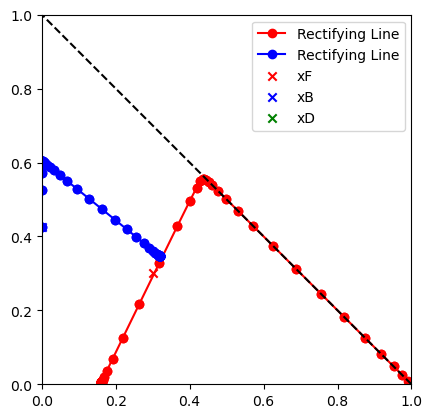

In [3]:
x_rect_comp = distillation_model.compute_rectifying_stages()[0]
x_strip_comp = distillation_model.compute_stripping_stages()[0]

# Extract x and y coordinates from x_array
x1_rect = x_rect_comp[:, 0]
x2_rect = x_rect_comp[:, 1]
x1_strip = x_strip_comp[:, 0]
x2_strip = x_strip_comp[:, 1]

# Plot the line connecting the points
plt.plot(x1_rect, x2_rect, '-o', label='Rectifying Line', color = "red")  # '-o' means a line with circle markers at each data point
plt.plot(x1_strip, x2_strip, '-o', label='Rectifying Line', color = "blue")  # '-o' means a line with circle markers at each data point

# Mark your special points
plt.scatter(xF[0], xF[1], marker='x', color='red', label='xF')
plt.scatter(xB[0], xB[1], marker='x', color='blue', label='xB')
plt.scatter(xD[0], xD[1], marker='x', color='green', label='xD')

# Set aspect ratio, limits, and diagonal line
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim([0, 1])
plt.xlim([0, 1])
plt.plot([1, 0], [0, 1], 'k--')  # Diagonal dashed line

# If you want to add a legend
plt.legend()

# Display the plot
plt.show()
